In [13]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from IPython import display

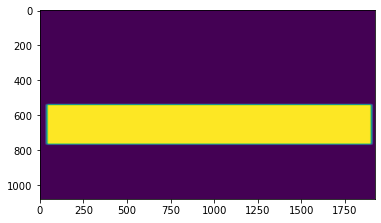

In [14]:
# マスク用単一色画像を作成
height = 100 # 生成画像の高さ
width = 100 # 生成画像の幅
imgMask = np.full((height, width, 1), 1, dtype=np.uint8)



# マスク範囲を四角形で描画
boxFromX = 2 #マスク範囲開始位置 X座標
boxFromY = 50 #マスク範囲開始位置 Y座標
boxToX = 98 #マスク範囲終了位置 X座標
boxToY = 70 #マスク範囲終了位置 Y座標
cv2.rectangle(imgMask, (boxFromX, boxFromY), (boxToX, boxToY),(255), cv2.FILLED)

img_resize = cv2.resize(imgMask, dsize=[1920,1080], fx=None, fy=None)

# マスク結果画像を保存
cv2.imwrite("./mask/testMaskImg.jpg", img_resize)
plt.imshow(img_resize)

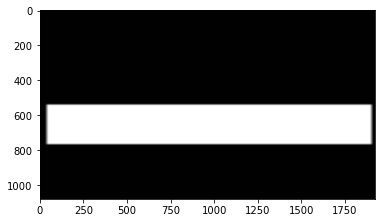

In [15]:
white=cv2.imread("./before/white.jpg",cv2.IMREAD_COLOR)
im_mask = cv2.imread('./mask/testMaskImg.jpg')
white_resize = cv2.resize(white, dsize=[1920,1080], fx=None, fy=None)
im_out = cv2.bitwise_and(white_resize, im_mask)
cv2.imwrite('./after/whitemask.jpg', im_out)
plt.imshow(im_out)

True

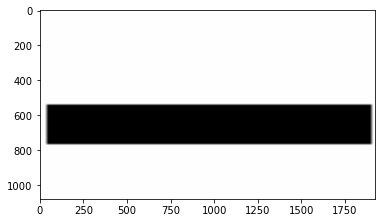

In [16]:
black=cv2.bitwise_not(im_out)
plt.imshow(black)
cv2.imwrite("./mask/blackmask.jpg",black)

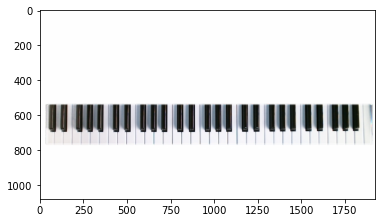

In [17]:
im_1 = cv2.imread('./before/hpiano0.jpg', cv2.IMREAD_COLOR)
im_mask = cv2.imread('./mask/blackmask.jpg')
plt.imshow(im_1)
plt.imshow(im_mask)
im_out = cv2.bitwise_or(im_1, im_mask)
cv2.imwrite('./after/out.jpg', im_out)
plt.imshow(im_out)

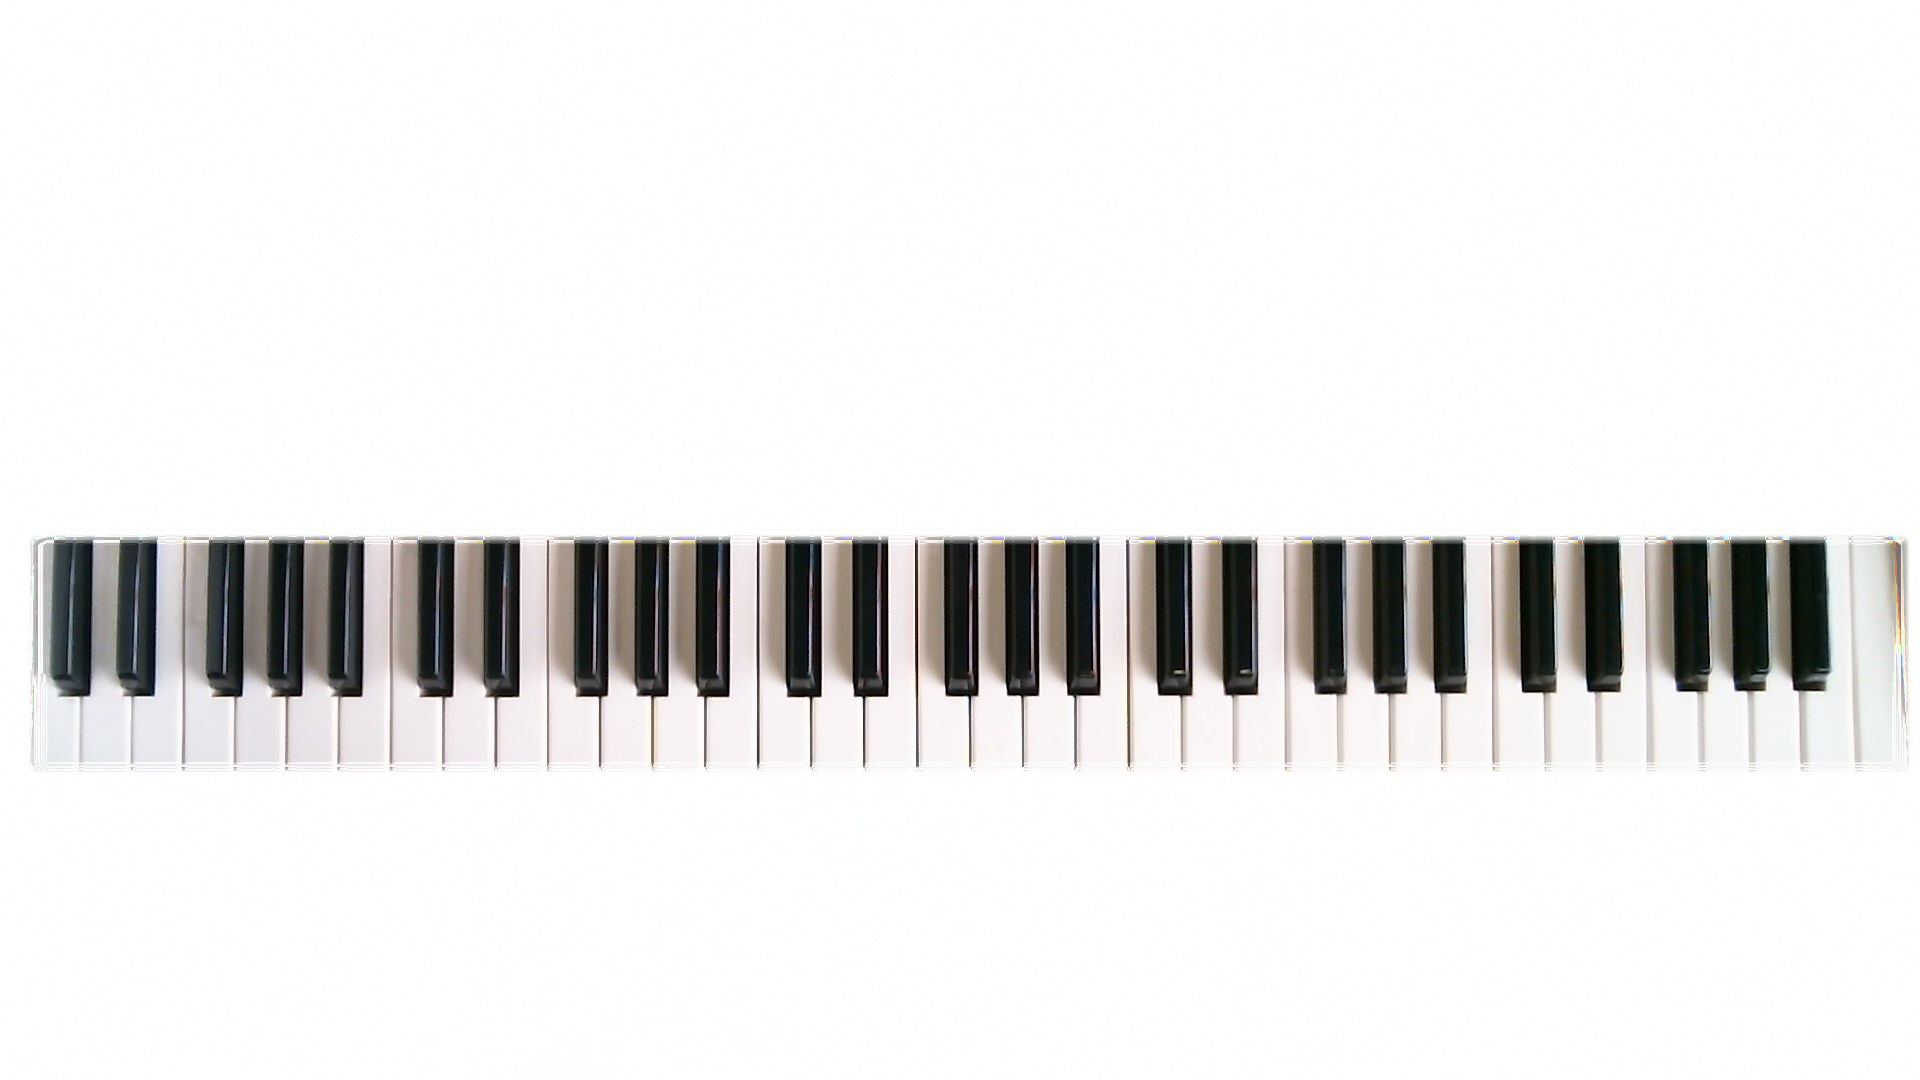

In [18]:
def imshow(img, format=".jpg", **kwargs):
    """ndarray 配列をインラインで Notebook 上に表示する。
    """
    img = cv2.imencode(format, img)[1]
    img = display.Image(img, **kwargs)
    display.display(img)


# 画像を読み込む。
img = cv2.imread("./after/out.jpg")
imshow(img)

#ここまではうまくいってる

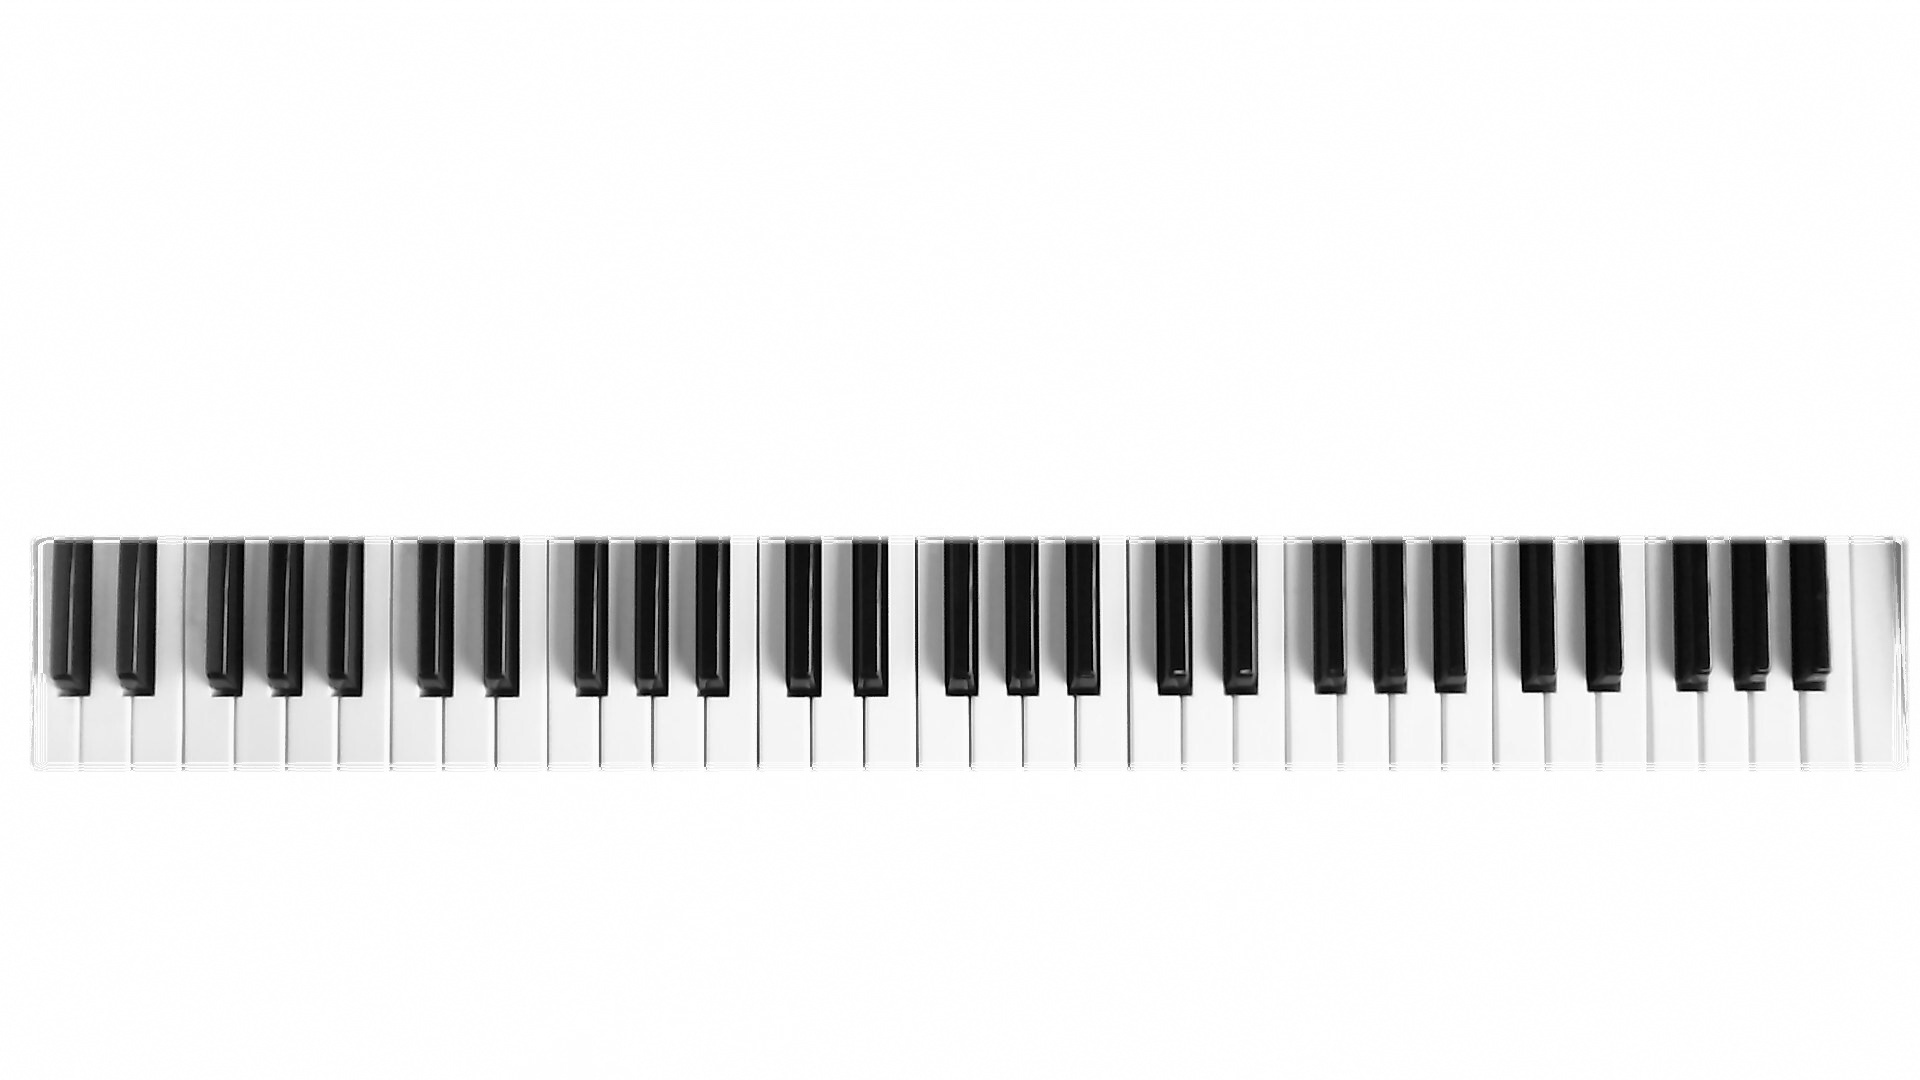

In [19]:
# グレースケールに変換する。
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
imshow(gray)

70.0


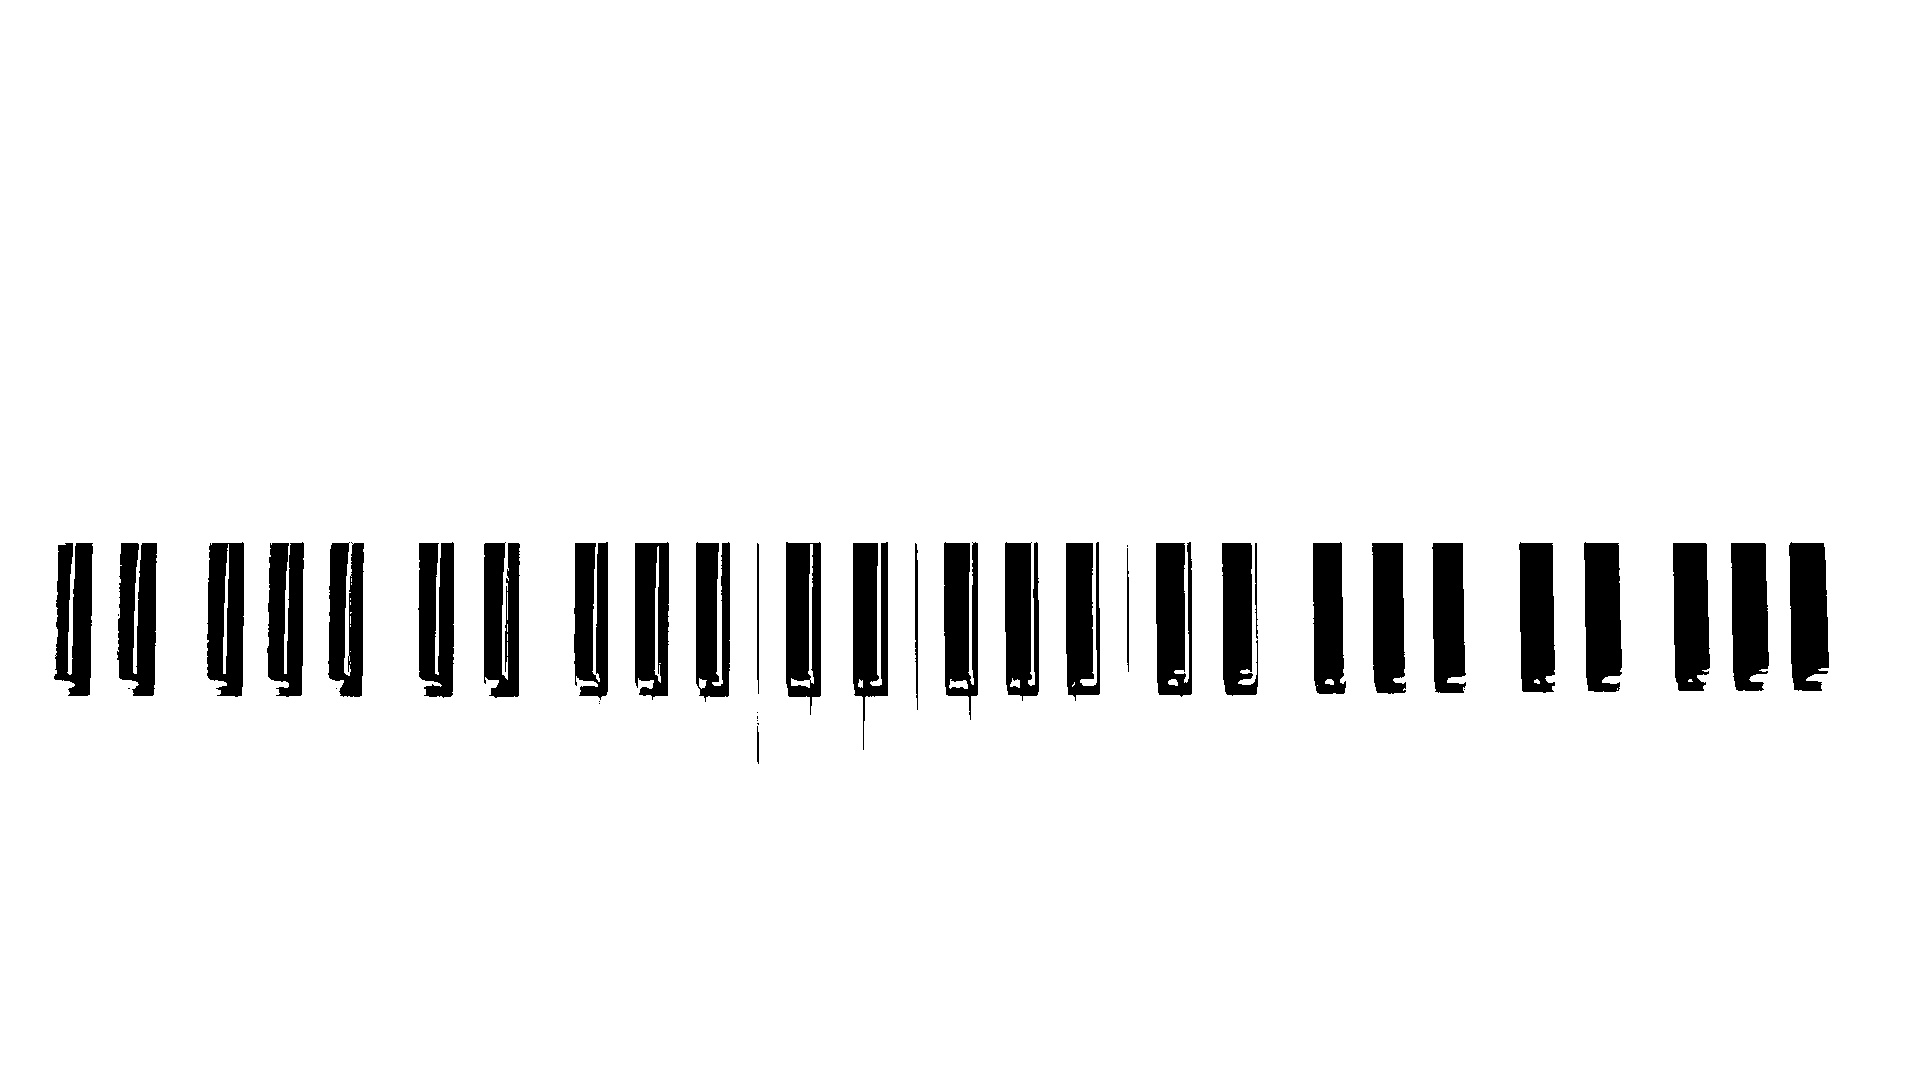

In [20]:




# 2値化する
ret, bin_img = cv2.threshold(gray, 70, 255, cv2.THRESH_BINARY)
print(ret)
cv2.imwrite("./after/grayspiano0.jpg",bin_img)
imshow(bin_img)


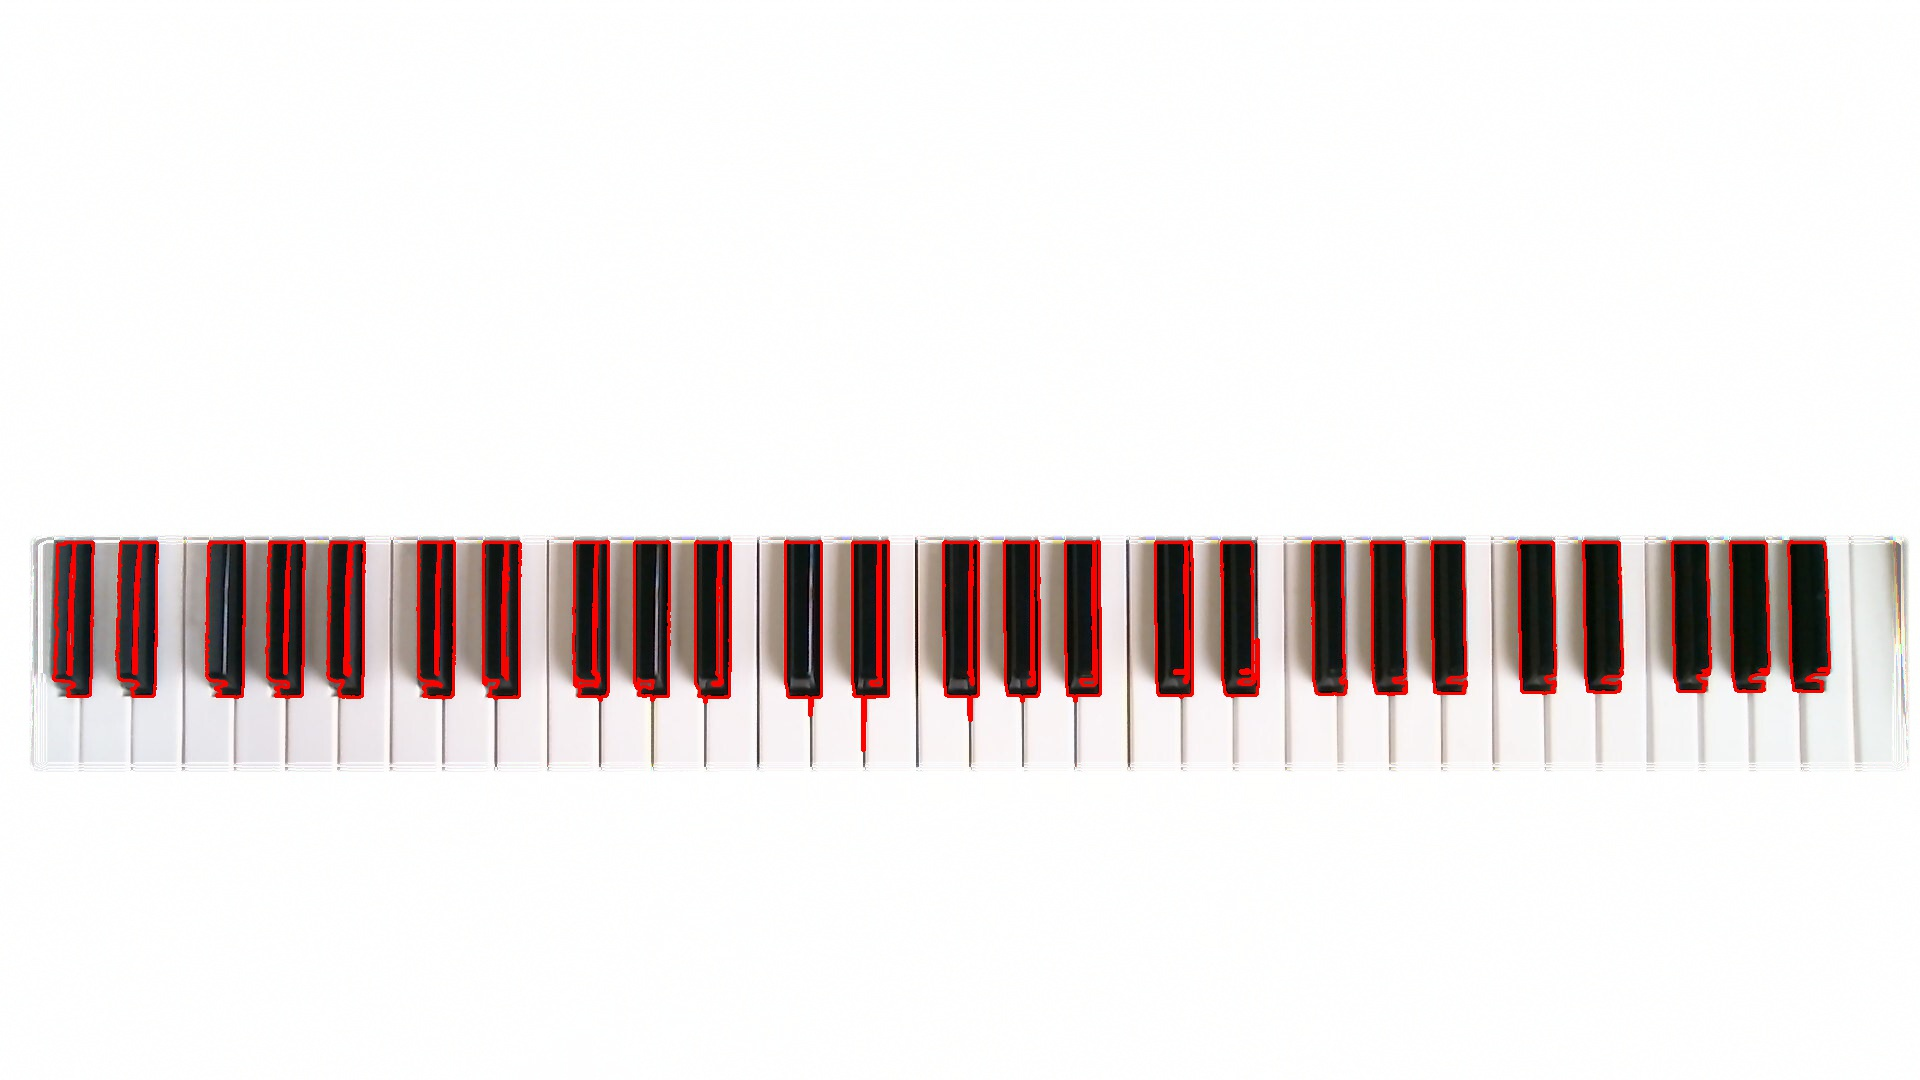

True

In [21]:
# 輪郭を抽出する。
contours, hierarchy = cv2.findContours(
    bin_img, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE
)

# 小さい輪郭は誤検出として削除する
contours = list(filter(lambda x: cv2.contourArea(x) > 2000, contours))
contours = list(filter(lambda x: cv2.contourArea(x) < 2000000, contours))
# 輪郭を描画する。
cv2.drawContours(img, contours, -1, color=(0, 0, 255), thickness=2)
imshow(img)
cv2.imwrite("./after/karisyori.jpg",img)

In [22]:
for i, cnt in enumerate(contours):
    print(f"contours[{i}].shape: {cnt.shape}")
  

contours[0].shape: (395, 1, 2)
contours[1].shape: (380, 1, 2)
contours[2].shape: (393, 1, 2)
contours[3].shape: (383, 1, 2)
contours[4].shape: (497, 1, 2)
contours[5].shape: (721, 1, 2)
contours[6].shape: (662, 1, 2)
contours[7].shape: (644, 1, 2)
contours[8].shape: (643, 1, 2)
contours[9].shape: (403, 1, 2)
contours[10].shape: (394, 1, 2)
contours[11].shape: (379, 1, 2)
contours[12].shape: (365, 1, 2)
contours[13].shape: (673, 1, 2)
contours[14].shape: (683, 1, 2)
contours[15].shape: (662, 1, 2)
contours[16].shape: (695, 1, 2)
contours[17].shape: (773, 1, 2)
contours[18].shape: (408, 1, 2)
contours[19].shape: (673, 1, 2)
contours[20].shape: (418, 1, 2)
contours[21].shape: (701, 1, 2)
contours[22].shape: (665, 1, 2)
contours[23].shape: (659, 1, 2)
contours[24].shape: (394, 1, 2)


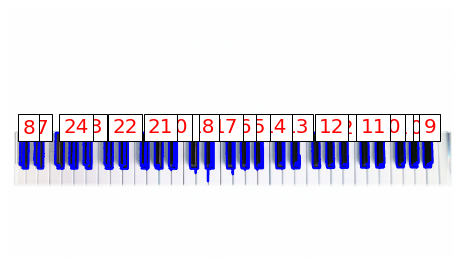

In [23]:
def draw_contours(ax, img, contours):
    ax.imshow(img)
    ax.set_axis_off()

    for i, cnt in enumerate(contours):
        # 形状を変更する。(NumPoints, 1, 2) -> (NumPoints, 2)
        cnt = cnt.squeeze(axis=1)
        # 輪郭の点同士を結ぶ線を描画する。
        ax.add_patch(plt.Polygon(cnt, color="b", fill=None, lw=2))
        # 輪郭の点を描画する。
        #ax.plot(cnt[:, 0], cnt[:, 1], "ro", mew=0, ms=4)
        # 輪郭の番号を描画する。
        ax.text(cnt[0][0], cnt[0][1], i, color="r", size="20", bbox=dict(fc="w"))



fig, ax = plt.subplots(figsize=(8, 8))
draw_contours(ax, img, contours)
plt.show()

In [24]:
# 輪郭を１つずつ書き込んで出力
for i in range(len(contours)):
    
        im_con = img
        print('ID', i, 'Area', cv2.contourArea(contours[i]))
        im_con = cv2.drawContours(im_con, contours, i, (0,255,0), 2)
        cv2.imwrite('result' + str(i) + '.png', im_con)
        print(approx_contours)

ID 0 Area 5163.5


NameError: name 'approx_contours' is not defined